## <b><u>Section 01:</u></b> Reading Dataset and Preprocessing the Data

### <b><li>1.1</b> Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from utils import clean_str, loadWord2Vec
import sys
!pip install neattext
import neattext.functions as nfx
import os
import random
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
from utils import loadWord2Vec, clean_str
from math import log
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from __future__ import division
from __future__ import print_function
!pip install tensorflow==1.14.0
import time
#import tensorflow as tf
import tensorflow.compat.v1 as tf
from sklearn import metrics
from utils import *
from models import GCN, MLP
import matplotlib.pyplot as plt
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 114 kB 8.9 MB/s 
     |████████████████████████████████| 109.3 MB 53 kB/s 
     |████████████████████████████████| 488 kB 68.0 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
     |████████████████████████████████| 3.1 MB 51.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently ta

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### <b><li>1.2</b> Importing Dataset from Google Drive and Intial Cleaning of the Data

In [2]:
# Mount Google Drive
drive.mount('/content/gdrive')
Suicide_Detection = pd.read_csv('/content/gdrive/MyDrive/Suicide_Detection_GNN/Suicide_Detection.csv')

print("Before Clean Up:- ",Suicide_Detection.shape)
#Cleaning the Data
Suicide_Detection['text']=Suicide_Detection['text'].str.strip()
Suicide_Detection['text'] = Suicide_Detection['text'].str.lower()
Suicide_Detection['text'] = Suicide_Detection['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
Suicide_Detection['text'] = Suicide_Detection['text'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","", elem))  
# remove numbers
Suicide_Detection['text'] = Suicide_Detection['text'].apply(lambda elem: re.sub(r"\d+","", elem))
Suicide_Detection['text']=Suicide_Detection['text'].str.strip()
Suicide_Detection['text'].replace('', np.nan, inplace=True)
Suicide_Detection = Suicide_Detection.dropna(axis=0, subset=['text'])
print('After Cleaan Up:-',Suicide_Detection.shape)

Mounted at /content/gdrive
Before Clean Up:-  (232041, 3)
After Cleaan Up:- (231974, 3)


### <b><li>1.3</b> Parameterizing the Components

In [3]:
no_Frequency=5 # it retaions only those words which are repeated specified number of times
dataset = 'suicide'
maxLimit_slice=500
word_embeddings_dim=300

### <b><li>1.4</b> Slicing the Dataset and filtering only text column out of it

In [4]:
# Slicing the huge Data according to our needs for experimental purpose
Suicide_Detection=Suicide_Detection[0:maxLimit_slice]
Suicide_Detection.to_csv('suicideClean.csv') #Dumping the sliced and Cleaned Data on to CSV file
Suicide_Detection=Suicide_Detection['text']  #Assigning only text column

### <b><li>1.5</b> Preprocessing the Data

### <b><li>1.5.1</b> Counting the Frequency of words appearing in the whole corpus.

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

doc_content_list = []
for  row in Suicide_Detection:
  doc_content_list.append(row.strip())

word_freq = {}  # to remove rare words
for doc_content in doc_content_list:
    temp = clean_str(doc_content)
    words = temp.split()
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

print("Frequency of Each words--> ",word_freq.items())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Frequency of Each words-->  dict_items([('ex', 18), ('wife', 12), ('threatening', 2), ('suiciderecently', 1), ('i', 3558), ('left', 43), ('my', 1291), ('for', 561), ('good', 113), ('because', 234), ('she', 220), ('has', 138), ('cheated', 5), ('on', 336), ('me', 883), ('twice', 14), ('and', 1818), ('lied', 5), ('to', 2245), ('so', 505), ('much', 127), ('that', 690), ('have', 537), ('decided', 14), ('refuse', 1), ('go', 150), ('back', 95), ('her', 188), ('as', 173), ('of', 972), ('a', 1323), ('few', 57), ('days', 51), ('ago', 48), ('began', 8), ('suicide', 83), ('tirelessly', 1), ('spent', 19), ('these', 57), ('paat', 1), ('talking', 33), ('out', 254), ('it', 821), ('keeps', 9), ('hesitating', 2), ('wants', 23), ('believe', 22), ('ill', 91), ('come', 40), ('know', 309), ('lot', 51), ('people', 209), ('will', 148), ('threaten', 1), ('this', 537), ('in', 695), ('order', 1)

### <b><li>1.5.2</b> Retaining words in the scent which are appearing equal or greater than specific number of times.

In [6]:
clean_docs = []
for doc_content in doc_content_list:
    temp = clean_str(doc_content)
    words = temp.split()
    doc_words = []
    for word in words:
      if word not in stop_words and word_freq[word] >= no_Frequency: # no_Frequency is defined in section 1.3
        string=word
        string = re.sub(r"'s\b", "", string)
        string = re.sub(r"\'s", " \'s", string)
        string = re.sub(r"\'ve", " \'ve", string)
        string = re.sub(r"n\'t", " n\'t", string)
        string = re.sub(r"\'re", " \'re", string)
        string = re.sub(r"\'d", " \'d", string)
        string = re.sub(r"\'ll", " \'ll", string)
        string = re.sub(r",", " , ", string)
        string = re.sub(r"!", " ! ", string)
        string = re.sub(r"\(", " \( ", string)
        string = re.sub(r"\)", " \) ", string)
        string = re.sub(r"\?", " \? ", string)
        string = re.sub(r"\s{2,}", " ", string)
        word=string
        word= nfx.remove_special_characters(word) 
        doc_words.append(word)

    doc_str = ' '.join(doc_words).strip()
    clean_docs.append(doc_str)

clean_corpus_str = '\n'.join(clean_docs)
f = open('data/corpus/' + dataset + '.clean.txt', 'w')
f.write(clean_corpus_str)
f.close()

min_len = 10000
aver_len = 0
max_len = 0 

f = open('data/corpus/' + dataset + '.clean.txt', 'r')
lines = f.readlines()
for line in lines:
    line = line.strip()
    temp = line.split()
    aver_len = aver_len + len(temp)
    if len(temp) < min_len:
        min_len = len(temp)
    if len(temp) > max_len:
        max_len = len(temp)
f.close()
aver_len = 1.0 * aver_len / len(lines)
print('min_len : ' + str(min_len))
print('max_len : ' + str(max_len))
print('average_len : ' + str(aver_len))

min_len : 0
max_len : 613
average_len : 49.164


## <b><u>Section 02:-</u></b> Building Graph

### <b><li>2.1</b> Splitting Target Labels as Train & Test

In [7]:
# shulffing
doc_name_list = []
doc_train_list = []
doc_test_list = []

f = open('data/' + dataset + '.txt', 'r') # Reads the data on to doc_name_list
lines = f.readlines()
for line in lines:
    doc_name_list.append(line.strip())
    temp = line.split("\t")
    if temp[1].find('test') != -1:
        doc_test_list.append(line.strip())
    elif temp[1].find('train') != -1:
        doc_train_list.append(line.strip())
f.close()

print("\n lenght of list is -->",len(doc_name_list),"Reading BOTH TRAIN Data and Test Data on to list(doc_name_list):- \n",doc_name_list)
print("lenght of list is -->",len(doc_train_list),"Reading ONLY TRAIN Data on to list:- \n",doc_train_list)
print("lenght of list is -->",len(doc_test_list),"Reading ONLY TEST Data on to list:- \n",doc_test_list)


 lenght of list is --> 499 Reading BOTH TRAIN Data and Test Data on to list(doc_name_list):- 
 ['0\ttrain\t1', '1\ttrain\t0', '2\ttrain\t0', '3\ttrain\t1', '4\ttrain\t1', '5\ttrain\t1', '6\ttrain\t1', '7\ttrain\t1', '8\ttrain\t0', '9\ttrain\t1', '10\ttrain\t1', '11\ttrain\t1', '12\ttrain\t1', '13\ttrain\t1', '14\ttrain\t1', '15\ttrain\t0', '16\ttrain\t1', '17\ttrain\t0', '18\ttrain\t0', '19\ttrain\t1', '20\ttrain\t1', '21\ttrain\t0', '22\ttrain\t1', '23\ttrain\t0', '24\ttrain\t0', '25\ttrain\t1', '26\ttrain\t0', '27\ttrain\t1', '28\ttrain\t1', '29\ttrain\t0', '30\ttrain\t1', '31\ttrain\t1', '32\ttrain\t0', '33\ttrain\t1', '34\ttrain\t1', '35\ttrain\t0', '36\ttrain\t1', '37\ttrain\t1', '38\ttrain\t1', '39\ttrain\t0', '40\ttrain\t0', '41\ttrain\t1', '42\ttrain\t1', '43\ttrain\t0', '44\ttrain\t1', '45\ttrain\t0', '46\ttrain\t1', '47\ttrain\t0', '48\ttrain\t1', '49\ttrain\t0', '50\ttrain\t1', '51\ttrain\t1', '52\ttrain\t0', '53\ttrain\t0', '54\ttrain\t1', '55\ttrain\t0', '56\ttrain\t0', '

### <b><li>2.2</b> Copying the Clean text to doc_content_list

In [8]:
doc_content_list = []
f = open('data/corpus/' + dataset + '.clean.txt', 'r')
lines = f.readlines()
for line in lines:
    doc_content_list.append(line.strip())
f.close()
print("Length of whole corpus(doc_content_list):-",len(doc_content_list))
print("Whole corpus(doc_content_list):- \n",doc_content_list)

Length of whole corpus(doc_content_list):- 500
Whole corpus(doc_content_list):- 
 ['ex wife left wife good cheated twice lied much decided go back days ago began suicide spent days talking keeps wants believe ill come back know lot people get way happens really supposed handle death still love wife cannot deal getting cheated constantly feeling im worried today may day hope much doesnt happen', 'weird dont get coming someone know irl feel really good internet strangers', 'finally almost never hear bad year ever fucking god', 'need help im crying hard', 'im name ive struggling years im afraid past years thoughts suicide fear anxiety im close ive long im scared come family feelings years ago losing everyday feeling hopeless lost things ive done thoughts like little ive experienced life time ive feelings family broke saw cuts watching get worried something day made feel absolutely later found attempt attempt pills attempt hanging happened pills never went im still afraid first therapy dia

### <b><li>2.3</b> Building Training list with shuffled Index & Copying training index in to index file</b>

In [9]:
train_ids = []
for train_name in doc_train_list:
    train_id = doc_name_list.index(train_name)
    train_ids.append(train_id)
random.shuffle(train_ids)
print("Reading train index from the Train set & Shuffling it(train_ids)--> \n",train_ids)

Reading train index from the Train set & Shuffling it(train_ids)--> 
 [45, 74, 94, 174, 166, 182, 51, 137, 199, 33, 81, 89, 172, 185, 72, 65, 37, 88, 125, 2, 80, 214, 225, 134, 124, 246, 147, 82, 92, 148, 191, 8, 126, 34, 233, 129, 90, 145, 216, 188, 231, 154, 201, 87, 68, 198, 127, 155, 195, 104, 85, 0, 206, 3, 189, 108, 242, 75, 84, 17, 138, 16, 86, 165, 6, 35, 230, 141, 156, 169, 109, 77, 186, 100, 178, 132, 139, 151, 179, 133, 196, 98, 247, 130, 47, 235, 176, 120, 93, 117, 58, 218, 59, 42, 140, 237, 107, 136, 238, 181, 128, 22, 197, 193, 239, 25, 105, 54, 103, 44, 143, 227, 55, 113, 52, 164, 5, 234, 180, 36, 131, 205, 10, 248, 18, 194, 71, 12, 158, 210, 204, 95, 32, 207, 14, 121, 168, 123, 30, 167, 38, 78, 202, 170, 144, 157, 223, 183, 161, 31, 79, 208, 13, 243, 184, 142, 224, 119, 50, 213, 192, 60, 53, 203, 175, 110, 114, 159, 219, 135, 26, 149, 163, 153, 7, 122, 41, 221, 43, 24, 48, 11, 69, 212, 249, 28, 62, 232, 97, 177, 241, 112, 160, 63, 76, 101, 115, 66, 226, 106, 73, 23, 152

### <b><li>2.4</b> Copying Shuffled list in to train.index file</b>

In [10]:
train_ids_str = '\n'.join(str(index) for index in train_ids)
f = open('data/' + dataset + '.train.index', 'w')
f.write(train_ids_str)
f.close()

### <b><li>2.5</b> Copying Shuffled list in to test.index file</b>

In [11]:
test_ids = []
for test_name in doc_test_list:
    test_id = doc_name_list.index(test_name)
    test_ids.append(test_id)
random.shuffle(test_ids)

test_ids_str = '\n'.join(str(index) for index in test_ids)
f = open('data/' + dataset + '.test.index', 'w')
f.write(test_ids_str)
f.close()

ids = train_ids + test_ids
print("Total lenght of ONLY id's of both Train & Test is:- ",len(ids))

Total lenght of ONLY id's of both Train & Test is:-  499


### <b><li>2.6</b> Rearranging the <b>Text</b> based on Shuffle index</b>

In [12]:
shuffle_doc_name_list = []
shuffle_doc_words_list = []
for id in ids:
    shuffle_doc_name_list.append(doc_name_list[int(id)])
    shuffle_doc_words_list.append(doc_content_list[int(id)])
shuffle_doc_name_str = '\n'.join(shuffle_doc_name_list)
shuffle_doc_words_str = '\n'.join(shuffle_doc_words_list)

f = open('data/' + dataset + '_shuffle.txt', 'w')
f.write(shuffle_doc_name_str)
f.close()

f = open('data/corpus/' + dataset + '_shuffle.txt', 'w')
f.write(shuffle_doc_words_str)
f.close()

print("Shuffled entire train and test Data -->",len(shuffle_doc_name_list))
print("Shuffled entire train and test Data -->",shuffle_doc_name_list)
print("Shuffled entire Corpus length -->",len(shuffle_doc_words_list))
print("Shuffled entire Corpus -->",shuffle_doc_words_list)

Shuffled entire train and test Data --> 499
Shuffled entire train and test Data --> ['45\ttrain\t0', '74\ttrain\t0', '94\ttrain\t0', '174\ttrain\t0', '166\ttrain\t0', '182\ttrain\t0', '51\ttrain\t1', '137\ttrain\t0', '199\ttrain\t0', '33\ttrain\t1', '81\ttrain\t1', '89\ttrain\t1', '172\ttrain\t0', '185\ttrain\t1', '72\ttrain\t0', '65\ttrain\t0', '37\ttrain\t1', '88\ttrain\t1', '125\ttrain\t0', '2\ttrain\t0', '80\ttrain\t0', '214\ttrain\t0', '225\ttrain\t0', '134\ttrain\t0', '124\ttrain\t1', '246\ttrain\t1', '147\ttrain\t0', '82\ttrain\t0', '92\ttrain\t0', '148\ttrain\t0', '191\ttrain\t0', '8\ttrain\t0', '126\ttrain\t0', '34\ttrain\t1', '233\ttrain\t0', '129\ttrain\t0', '90\ttrain\t1', '145\ttrain\t0', '216\ttrain\t0', '188\ttrain\t0', '231\ttrain\t0', '154\ttrain\t0', '201\ttrain\t0', '87\ttrain\t1', '68\ttrain\t0', '198\ttrain\t1', '127\ttrain\t1', '155\ttrain\t0', '195\ttrain\t1', '104\ttrain\t1', '85\ttrain\t1', '0\ttrain\t1', '206\ttrain\t1', '3\ttrain\t1', '189\ttrain\t1', '108\tt

### <b><li>2.7</b> Building Vocabulary file which contains every words used in the corpus

In [13]:
# build vocab
word_freq = {}
word_set = set()
for doc_words in shuffle_doc_words_list:
    words = doc_words.split()
    for word in words:
        word_set.add(word)
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

vocab = list(word_set)
vocab_size = len(vocab)

print("Vocab size of Entire corpus",vocab_size)
print("This dictinoary(word_freq) contains number of repeated words ",word_freq.items())

Vocab size of Entire corpus 1097
This dictinoary(word_freq) contains number of repeated words  dict_items([('math', 8), ('class', 16), ('always', 85), ('makes', 32), ('think', 153), ('id', 59), ('partner', 5), ('one', 188), ('like', 441), ('damn', 18), ('much', 127), ('hot', 6), ('gotta', 6), ('get', 235), ('sorry', 32), ('guys', 26), ('said', 44), ('weak', 10), ('yet', 25), ('whole', 28), ('shopping', 5), ('awful', 11), ('finally', 36), ('allowed', 6), ('go', 150), ('place', 25), ('ive', 271), ('say', 67), ('terrible', 14), ('walk', 12), ('theres', 26), ('looking', 29), ('type', 11), ('men', 10), ('every', 73), ('staring', 8), ('uncomfortable', 5), ('follow', 9), ('around', 57), ('keep', 64), ('also', 55), ('cant', 229), ('actually', 45), ('etc', 12), ('would', 168), ('try', 53), ('anything', 92), ('experience', 13), ('able', 47), ('dont', 447), ('want', 306), ('back', 95), ('ever', 73), ('thats', 53), ('going', 171), ('completely', 25), ('future', 19), ('online', 10), ('social', 20),

### <b><li>2.8</b> Building Vocabulary file which contains every words used in the corpus

In [15]:
word_doc_list = {}
word_vector_map = {}

for i in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    appeared = set()
    for word in words:
        if word in appeared:
            continue
        if word in word_doc_list:
            doc_list = word_doc_list[word]
            doc_list.append(i)
            word_doc_list[word] = doc_list
        else:
            word_doc_list[word] = [i]
        appeared.add(word)

word_doc_freq = {}
for word, doc_list in word_doc_list.items():
    word_doc_freq[word] = len(doc_list)

word_id_map = {}
for i in range(vocab_size):
    word_id_map[vocab[i]] = i

vocab_str = '\n'.join(vocab)

f = open('data/corpus/' + dataset + '_vocab.txt', 'w')
f.write(vocab_str)
f.close()


# label list
label_set = set()
for doc_meta in shuffle_doc_name_list:
    temp = doc_meta.split('\t')
    label_set.add(temp[2])
label_list = list(label_set)

label_list_str = '\n'.join(label_list)
f = open('data/corpus/' + dataset + '_labels.txt', 'w')
f.write(label_list_str)
f.close()

# x: feature vectors of training docs, no initial features
# slect 90% training set
train_size = len(train_ids)
val_size = int(0.1 * train_size)
real_train_size = train_size - val_size  # - int(0.5 * train_size)
# different training rates

real_train_doc_names = shuffle_doc_name_list[:real_train_size]
real_train_doc_names_str = '\n'.join(real_train_doc_names)

f = open('data/' + dataset + '.real_train.name', 'w')
f.write(real_train_doc_names_str)
f.close()

row_x = []
col_x = []
data_x = []
for i in range(real_train_size):
    doc_vec = np.array([0.0 for k in range(word_embeddings_dim)])
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    doc_len = len(words)
    for word in words:
        if word in word_vector_map:
            word_vector = word_vector_map[word]
            # print(doc_vec)
            # print(np.array(word_vector))
            doc_vec = doc_vec + np.array(word_vector)

    for j in range(word_embeddings_dim):
        row_x.append(i)
        col_x.append(j)
        # np.random.uniform(-0.25, 0.25)
        data_x.append(doc_vec[j] / doc_len)  # doc_vec[j]/ doc_len

# x = sp.csr_matrix((real_train_size, word_embeddings_dim), dtype=np.float32)
x = sp.csr_matrix((data_x, (row_x, col_x)), shape=(
    real_train_size, word_embeddings_dim))

y = []
for i in range(real_train_size):
    doc_meta = shuffle_doc_name_list[i]
    temp = doc_meta.split('\t')
    label = temp[2]
    one_hot = [0 for l in range(len(label_list))]
    label_index = label_list.index(label)
    one_hot[label_index] = 1
    y.append(one_hot)
y = np.array(y)
#print(y)

# tx: feature vectors of test docs, no initial features
test_size = len(test_ids)

row_tx = []
col_tx = []
data_tx = []
for i in range(test_size):
    doc_vec = np.array([0.0 for k in range(word_embeddings_dim)])
    doc_words = shuffle_doc_words_list[i + train_size]
    words = doc_words.split()
    doc_len = len(words)
    for word in words:
        if word in word_vector_map:
            word_vector = word_vector_map[word]
            doc_vec = doc_vec + np.array(word_vector)

    for j in range(word_embeddings_dim):
        row_tx.append(i)
        col_tx.append(j)
        # np.random.uniform(-0.25, 0.25)
        data_tx.append(doc_vec[j] / doc_len)  # doc_vec[j] / doc_len

# tx = sp.csr_matrix((test_size, word_embeddings_dim), dtype=np.float32)
tx = sp.csr_matrix((data_tx, (row_tx, col_tx)),
                   shape=(test_size, word_embeddings_dim))

ty = []
for i in range(test_size):
    doc_meta = shuffle_doc_name_list[i + train_size]
    temp = doc_meta.split('\t')
    label = temp[2]
    one_hot = [0 for l in range(len(label_list))]
    label_index = label_list.index(label)
    one_hot[label_index] = 1
    ty.append(one_hot)
ty = np.array(ty)
#print(ty)

# allx: the the feature vectors of both labeled and unlabeled training instances
# (a superset of x)
# unlabeled training instances -> words

word_vectors = np.random.uniform(-0.01, 0.01,
                                 (vocab_size, word_embeddings_dim))

for i in range(len(vocab)):
    word = vocab[i]
    if word in word_vector_map:
        vector = word_vector_map[word]
        word_vectors[i] = vector

row_allx = []
col_allx = []
data_allx = []

for i in range(train_size):
    doc_vec = np.array([0.0 for k in range(word_embeddings_dim)])
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    doc_len = len(words)
    for word in words:
        if word in word_vector_map:
            word_vector = word_vector_map[word]
            doc_vec = doc_vec + np.array(word_vector)

    for j in range(word_embeddings_dim):
        row_allx.append(int(i))
        col_allx.append(j)
        # np.random.uniform(-0.25, 0.25)
        data_allx.append(doc_vec[j] / doc_len)  # doc_vec[j]/doc_len
for i in range(vocab_size):
    for j in range(word_embeddings_dim):
        row_allx.append(int(i + train_size))
        col_allx.append(j)
        data_allx.append(word_vectors.item((i, j)))


row_allx = np.array(row_allx)
col_allx = np.array(col_allx)
data_allx = np.array(data_allx)

allx = sp.csr_matrix(
    (data_allx, (row_allx, col_allx)), shape=(train_size + vocab_size, word_embeddings_dim))

ally = []
for i in range(train_size):
    doc_meta = shuffle_doc_name_list[i]
    temp = doc_meta.split('\t')
    label = temp[2]
    one_hot = [0 for l in range(len(label_list))]
    label_index = label_list.index(label)
    one_hot[label_index] = 1
    ally.append(one_hot)

for i in range(vocab_size):
    one_hot = [0 for l in range(len(label_list))]
    ally.append(one_hot)

ally = np.array(ally)

print(x.shape, y.shape, tx.shape, ty.shape, allx.shape, ally.shape)

'''
Doc word heterogeneous graph
'''

# word co-occurence with context windows
window_size = 10
windows = []

for doc_words in shuffle_doc_words_list:
    words = doc_words.split()
    length = len(words)
    if length <= window_size:
        windows.append(words)
    else:
        # print(length, length - window_size + 1)
        for j in range(length - window_size + 1):
            window = words[j: j + window_size]
            windows.append(window)
            # print(window)


word_window_freq = {}
for window in windows:
    appeared = set()
    for i in range(len(window)):
        if window[i] in appeared:
            continue
        if window[i] in word_window_freq:
            word_window_freq[window[i]] += 1
        else:
            word_window_freq[window[i]] = 1
        appeared.add(window[i])

word_pair_count = {}
for window in windows:
    for i in range(1, len(window)):
        for j in range(0, i):
            word_i = window[i]
            word_i_id = word_id_map[word_i]
            word_j = window[j]
            word_j_id = word_id_map[word_j]
            if word_i_id == word_j_id:
                continue
            word_pair_str = str(word_i_id) + ',' + str(word_j_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1
            # two orders
            word_pair_str = str(word_j_id) + ',' + str(word_i_id)
            if word_pair_str in word_pair_count:
                word_pair_count[word_pair_str] += 1
            else:
                word_pair_count[word_pair_str] = 1

row = []
col = []
weight = []

# pmi as weights

num_window = len(windows)

for key in word_pair_count:
    temp = key.split(',')
    i = int(temp[0])
    j = int(temp[1])
    count = word_pair_count[key]
    word_freq_i = word_window_freq[vocab[i]]
    word_freq_j = word_window_freq[vocab[j]]
    pmi = log((1.0 * count / num_window) /
              (1.0 * word_freq_i * word_freq_j/(num_window * num_window)))
    if pmi <= 0:
        continue
    row.append(train_size + i)
    col.append(train_size + j)
    weight.append(pmi)

# doc word frequency
doc_word_freq = {}

for doc_id in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[doc_id]
    words = doc_words.split()
    for word in words:
        word_id = word_id_map[word]
        doc_word_str = str(doc_id) + ',' + str(word_id)
        if doc_word_str in doc_word_freq:
            doc_word_freq[doc_word_str] += 1
        else:
            doc_word_freq[doc_word_str] = 1

for i in range(len(shuffle_doc_words_list)):
    doc_words = shuffle_doc_words_list[i]
    words = doc_words.split()
    doc_word_set = set()
    for word in words:
        if word in doc_word_set:
            continue
        j = word_id_map[word]
        key = str(i) + ',' + str(j)
        freq = doc_word_freq[key]
        if i < train_size:
            row.append(i)
        else:
            row.append(i + vocab_size)
        col.append(train_size + j)
        idf = log(1.0 * len(shuffle_doc_words_list) /
                  word_doc_freq[vocab[j]])
        weight.append(freq * idf)
        doc_word_set.add(word)

node_size = train_size + vocab_size + test_size
adj = sp.csr_matrix(
    (weight, (row, col)), shape=(node_size, node_size))

# dump objects
f = open("data/ind.{}.x".format(dataset), 'wb')
pkl.dump(x, f)
f.close()

f = open("data/ind.{}.y".format(dataset), 'wb')
pkl.dump(y, f)
f.close()

f = open("data/ind.{}.tx".format(dataset), 'wb')
pkl.dump(tx, f)
f.close()

f = open("data/ind.{}.ty".format(dataset), 'wb')
pkl.dump(ty, f)
f.close()

f = open("data/ind.{}.allx".format(dataset), 'wb')
pkl.dump(allx, f)
f.close()

f = open("data/ind.{}.ally".format(dataset), 'wb')
pkl.dump(ally, f)
f.close()

f = open("data/ind.{}.adj".format(dataset), 'wb')
pkl.dump(adj, f)
f.close()

print("************************************************************************")
print("*****************************ENDING*************************************")
print("************************************************************************")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in double_scalars


(225, 300) (225, 2) (249, 300) (249, 2) (1347, 300) (1347, 2)
************************************************************************
*****************************ENDING*************************************
************************************************************************


## <b><u>Section 03:</b></u>Creating Model & Evaluating it

In [16]:
# Custom code
train_losses=[]
train_accu=[]
eval_losses=[]
eval_accu=[]

# Set random seed
seed = random.randint(1, 200)
np.random.seed(seed)
tf.set_random_seed(seed)

# Settings
os.environ["CUDA_VISIBLE_DEVICES"] = ""

####Delete all flags before declare#####

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_float('learning_rate', 0.02, 'Initial learning rate.')
tf.app.flags.DEFINE_string('f', '', 'kernel')

# 'cora', 'citeseer', 'pubmed'
flags.DEFINE_string('dataset', dataset, 'Dataset string.')
# 'gcn', 'gcn_cheby', 'dense'
flags.DEFINE_string('model', 'gcn', 'Model string.')
#flags.DEFINE_float('learning_rate', 0.02, 'Initial learning rate.')
flags.DEFINE_integer('epochs', 200, 'Number of epochs to train.')
flags.DEFINE_integer('hidden1', 200, 'Number of units in hidden layer 1.')
flags.DEFINE_float('dropout', 0.5, 'Dropout rate (1 - keep probability).')
flags.DEFINE_float('weight_decay', 0,
                   'Weight for L2 loss on embedding matrix.')  # 5e-4
flags.DEFINE_integer('early_stopping', 10,
                     'Tolerance for early stopping (# of epochs).')
flags.DEFINE_integer('max_degree', 3, 'Maximum Chebyshev polynomial degree.')

# Load data
#print("CHECK THE DATASET---> ",FLAGS.dataset)
#adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, train_size, test_size = load_corpus(
#    FLAGS.dataset)
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, train_size, test_size = load_corpus(FLAGS.dataset)
print(adj)
# print(adj[0], adj[1])
features = sp.identity(features.shape[0])  # featureless

print(adj.shape)
print(features.shape)

# Some preprocessing
features = preprocess_features(features)
if FLAGS.model == 'gcn':
#if 'gcn' == 'gcn':
    support = [preprocess_adj(adj)]
    num_supports = 1
    model_func = GCN
elif FLAGS.model == 'gcn_cheby':
    support = chebyshev_polynomials(adj, FLAGS.max_degree)
    num_supports = 1 + FLAGS.max_degree
    model_func = GCN
elif FLAGS.model == 'dense':
    support = [preprocess_adj(adj)]  # Not used
    num_supports = 1
    model_func = MLP
else:
    raise ValueError('Invalid argument for model: ' + str(FLAGS.model))

# Define placeholders
placeholders = {
    'support': [tf.sparse_placeholder(tf.float32) for _ in range(num_supports)],
    'features': tf.sparse_placeholder(tf.float32, shape=tf.constant(features[2], dtype=tf.int64)),
    'labels': tf.placeholder(tf.float32, shape=(None, y_train.shape[1])),
    'labels_mask': tf.placeholder(tf.int32),
    'dropout': tf.placeholder_with_default(0., shape=()),
    # helper variable for sparse dropout
    'num_features_nonzero': tf.placeholder(tf.int32)
}

# Create model
print(features[2][1])
model = model_func(placeholders, input_dim=features[2][1], logging=True)

# Initialize session
session_conf = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=session_conf)


# Define model evaluation function
def evaluate(features, support, labels, mask, placeholders):
    t_test = time.time()
    feed_dict_val = construct_feed_dict(
        features, support, labels, mask, placeholders)
    outs_val = sess.run([model.loss, model.accuracy, model.pred, model.labels], feed_dict=feed_dict_val)
    return outs_val[0], outs_val[1], outs_val[2], outs_val[3], (time.time() - t_test)


# Init variables
sess.run(tf.global_variables_initializer())

cost_val = []

# Train model
for epoch in range(FLAGS.epochs):

    t = time.time()
    # Construct feed dictionary
    feed_dict = construct_feed_dict(
        features, support, y_train, train_mask, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS.dropout})

    # Training step
    outs = sess.run([model.opt_op, model.loss, model.accuracy,
                     model.layers[0].embedding], feed_dict=feed_dict)

    # Validation
    cost, acc, pred, labels, duration = evaluate(
        features, support, y_val, val_mask, placeholders)
    cost_val.append(cost)

    print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(outs[1]),
          "train_acc=", "{:.5f}".format(
              outs[2]), "val_loss=", "{:.5f}".format(cost),
          "val_acc=", "{:.5f}".format(acc), "time=", "{:.5f}".format(time.time() - t))
    # custom code added on November 5th 2021
    train_accu.append( float("{:.2f}".format(outs[2])))
    train_losses.append(float("{:.2f}".format(outs[1])))
    eval_losses.append(float("{:.2f}".format(cost)))
    eval_accu.append(float("{:.2f}".format(acc)))
    

    if epoch > FLAGS.early_stopping and cost_val[-1] > np.mean(cost_val[-(FLAGS.early_stopping+1):-1]):
        print("Early stopping...")
        break

print("Optimization Finished!")

# Testing
test_cost, test_acc, pred, labels, test_duration = evaluate(
    features, support, y_test, test_mask, placeholders)
print("Test set results:", "cost=", "{:.5f}".format(test_cost),
      "accuracy=", "{:.5f}".format(test_acc), "time=", "{:.5f}".format(test_duration))

test_pred = []
test_labels = []
print(len(test_mask))
for i in range(len(test_mask)):
    if test_mask[i]:
        test_pred.append(pred[i])
        test_labels.append(labels[i])

print("Test Precision, Recall and F1-Score...")
print(metrics.classification_report(test_labels, test_pred, digits=4))
print("Macro average Test Precision, Recall and F1-Score...")
print(metrics.precision_recall_fscore_support(test_labels, test_pred, average='macro'))
print("Micro average Test Precision, Recall and F1-Score...")
print(metrics.precision_recall_fscore_support(test_labels, test_pred, average='micro'))

# doc and word embeddings
print('embeddings:')
word_embeddings = outs[3][train_size: adj.shape[0] - test_size]
train_doc_embeddings = outs[3][:train_size]  # include val docs
test_doc_embeddings = outs[3][adj.shape[0] - test_size:]

print(len(word_embeddings), len(train_doc_embeddings),
      len(test_doc_embeddings))
print(word_embeddings)

f = open('data/corpus/' + dataset + '_vocab.txt', 'r')
words = f.readlines()
f.close()

vocab_size = len(words)
word_vectors = []
for i in range(vocab_size):
    word = words[i].strip()
    word_vector = word_embeddings[i]
    word_vector_str = ' '.join([str(x) for x in word_vector])
    word_vectors.append(word + ' ' + word_vector_str)

word_embeddings_str = '\n'.join(word_vectors)
f = open('data/' + dataset + '_word_vectors.txt', 'w')
f.write(word_embeddings_str)
f.close()

doc_vectors = []
doc_id = 0
for i in range(train_size):
    doc_vector = train_doc_embeddings[i]
    doc_vector_str = ' '.join([str(x) for x in doc_vector])
    doc_vectors.append('doc_' + str(doc_id) + ' ' + doc_vector_str)
    doc_id += 1

for i in range(test_size):
    doc_vector = test_doc_embeddings[i]
    doc_vector_str = ' '.join([str(x) for x in doc_vector])
    doc_vectors.append('doc_' + str(doc_id) + ' ' + doc_vector_str)
    doc_id += 1

doc_embeddings_str = '\n'.join(doc_vectors)
f = open('data/' + dataset + '_doc_vectors.txt', 'w')
f.write(doc_embeddings_str)
f.close()

(225, 300) (225, 2) (249, 300) (249, 2) (1347, 300) (1347, 2)
1596
  (0, 255)	6.880034747023475
  (0, 305)	4.420846626523463
  (0, 367)	3.077111879822369
  (0, 502)	3.647656738289982
  (0, 686)	2.880401585576315
  (0, 710)	1.848678130113967
  (0, 711)	4.603168183317418
  (0, 737)	2.880401585576315
  (0, 789)	4.811887211962397
  (0, 895)	5.098088899243745
  (0, 1026)	1.8951179822152082
  (0, 1051)	4.603168183317418
  (0, 1052)	1.3298041731651478
  (0, 1057)	1.597485578910259
  (0, 1214)	1.5030758944391844
  (0, 1240)	4.603168183317418
  (1, 348)	3.1215636423932027
  (1, 531)	2.6862455711353572
  (1, 708)	2.9545095577300367
  (1, 1241)	4.0153815184153
  (2, 282)	2.5237266416375825
  (2, 325)	4.133164554071683
  (2, 327)	3.910021002757473
  (2, 330)	4.420846626523463
  (2, 338)	2.657258034262105
  :	:
  (1593, 661)	3.647656738289982
  (1593, 671)	7.455398891927037
  (1593, 698)	6.069104530807146
  (1593, 710)	0.9243390650569835
  (1593, 711)	9.206336366634837
  (1593, 725)	3.3793927516953

## <b><u>Section 04:</u></b>- Visualization of Accuracy and loss

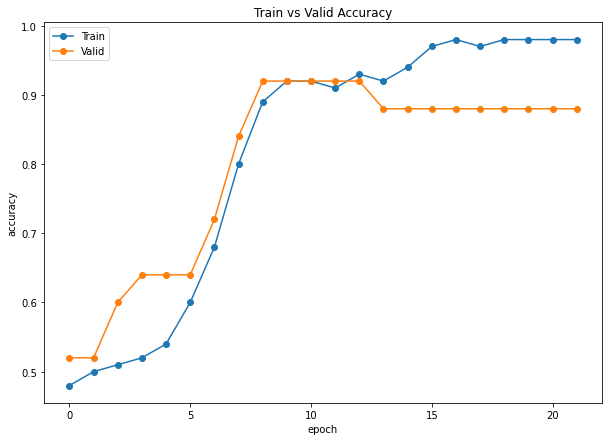

In [17]:
#plot accuracy
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

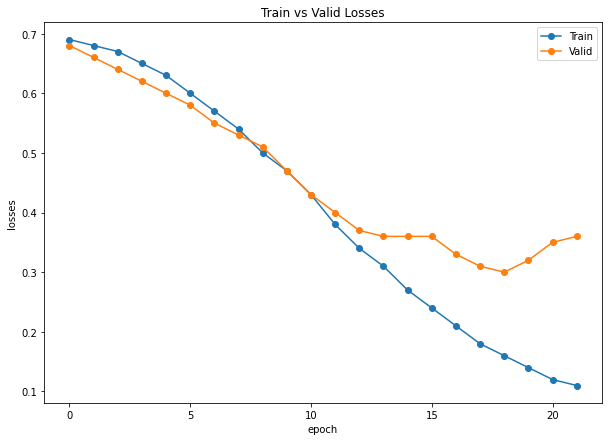

In [18]:
#plot losses
plt.figure(figsize = (10,7))
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


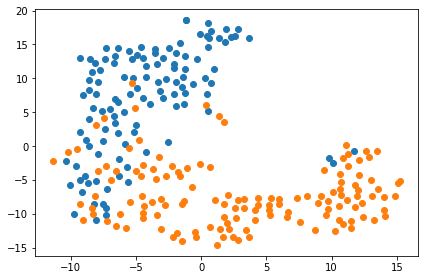

In [19]:
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np


f = open('data/suicide_shuffle.txt', 'r')
lines = f.readlines()
f.close()

f = open('data/suicide_doc_vectors.txt', 'r')
embedding_lines = f.readlines()
f.close()

target_names = set()
labels = []
docs = []
for i in range(len(lines)):
    line = lines[i].strip()
    temp = line.split('\t')
    if temp[1].find('test') != -1:
        labels.append(temp[2])
        emb_str = embedding_lines[i].strip().split()
        values_str_list = emb_str[1:]
        values = [float(x) for x in values_str_list]
        docs.append(values)
        target_names.add(temp[2])

target_names = list(target_names)

label = np.array(labels)

fea = TSNE(n_components=2).fit_transform(docs)
pdf = PdfPages('gcn_doc_test_2nd_layer.pdf')
cls = np.unique(label)

# cls=range(10)
fea_num = [fea[label == i] for i in cls]
for i, f in enumerate(fea_num):
    if cls[i] in range(10):
        plt.scatter(f[:, 0], f[:, 1], label=cls[i], marker='+')
    else:
        plt.scatter(f[:, 0], f[:, 1], label=cls[i])
# plt.legend(ncol=2,  )
# plt.legend(ncol=5,loc='upper center',bbox_to_anchor=(0.48, -0.08),fontsize=11)
# plt.ylim([-20,35])
# plt.title(md_file)
plt.tight_layout()
pdf.savefig()
plt.show()
pdf.close()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


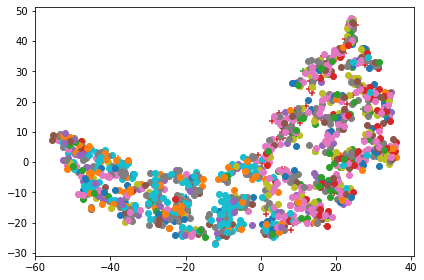

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

f = open('data/suicide_word_vectors.txt', 'r')
embedding_lines = f.readlines()
f.close()

target_names = set()
labels = []
docs = []
for i in range(len(embedding_lines)):
    line = embedding_lines[i].strip()
    temp = line.split('\t')
    emb_str = embedding_lines[i].strip().split()
    values_str_list = emb_str[1:]
    values = [float(x) for x in values_str_list]
    label = np.argmax(values)
    docs.append(values)
    target_names.add(label)
    labels.append(label)

target_names = list(target_names)

label = np.array(labels)

fea = TSNE(n_components=2).fit_transform(docs)
pdf = PdfPages('suicide_gcn_word_2nd_layer.pdf')
cls = np.unique(label)

# cls=range(10)
fea_num = [fea[label == i] for i in cls]
for i, f in enumerate(fea_num):
    if cls[i] in range(10):
        plt.scatter(f[:, 0], f[:, 1], label=cls[i], marker='+')
    else:
        plt.scatter(f[:, 0], f[:, 1], label=cls[i])
# plt.legend(ncol=2,  )
# plt.legend(ncol=5,loc='upper center',bbox_to_anchor=(0.48, -0.08),fontsize=11)
# plt.ylim([-20,35])
# plt.title(md_file)
plt.tight_layout()
pdf.savefig()
plt.show()
pdf.close()